In [1]:
%matplotlib inline

# ML-7. Кластеризация
Задача кластеризации: найти отображение множества входных объектов $X$, которое разделило бы множество $X$ на подгруппы. Кластеризация — это обучение без учителя.

Формальная запись задачи кластеризации выглядит следующим образом:

Пусть $X$ — множество объектов,  $Y$ — множество метод кластеров (идентификаторов их принадлежности). На множестве $X$ задана функция, которая вычисляет расстояние между объектами:

$\rho\left(x, x^{\prime}\right)$. 

Также дана конечная обучающая выборка объектов: $X^{m}=\left\{x_{1}, \ldots, x_{m}\right\} \subset X$ 

Нам надо разбить выборку на кластеры, то есть поставить каждому объекту $X$ в соответствие метку $y_{i} \in Y$ так, чтобы внутри каждого кластера объекты были как можно более близки (то есть расстояние должно быть минимальным), а объекты из разных кластеров значительно различались.

В задаче кластеризации входные данные задаются двумя способами:

- Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
- Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных
объектов выборки

**Некорректность задачи кластеризации** — решение задачи кластеризации принципиально неоднозначно:

- Нет **точной постановки** задачи кластеризации.
- Существует **множество критериев** качества кластеризации.
- Существует **множество методов** кластеризации.
- Часто заранее **неизвестно число кластеров**.
- Результат кластеризации зависит от **метрики**, которая **задаётся субъективно**.

**Разные цели кластеризации:**
- Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности
- Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные
- Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров
- Построить иерархию множества объектов: задача таксономии.  

**Разнообразие условий задач кластеризации.**
- Подробнее про условия задач мы поговорим в следующем уроке.

## 7.5. K-means. Практика

In [2]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
plt.rcParams['figure.figsize'] = 12, 8

In [4]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

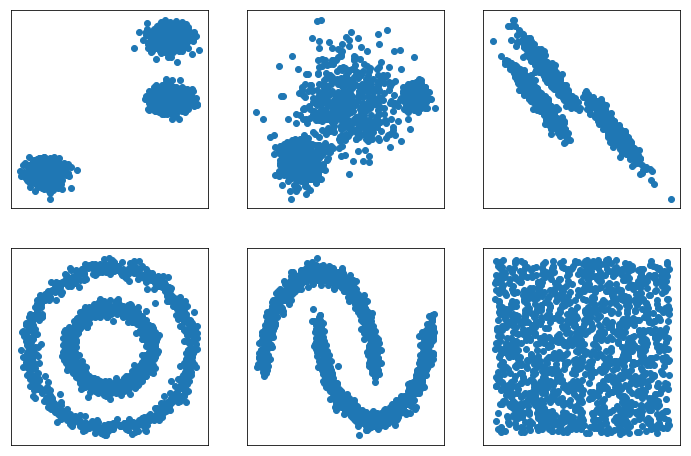

In [5]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

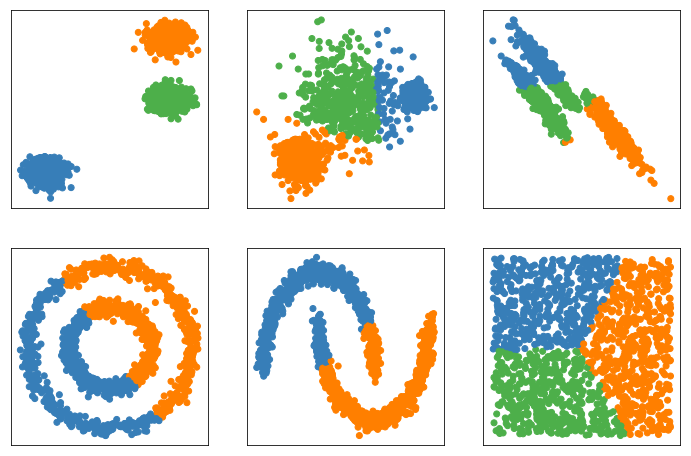

In [7]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:


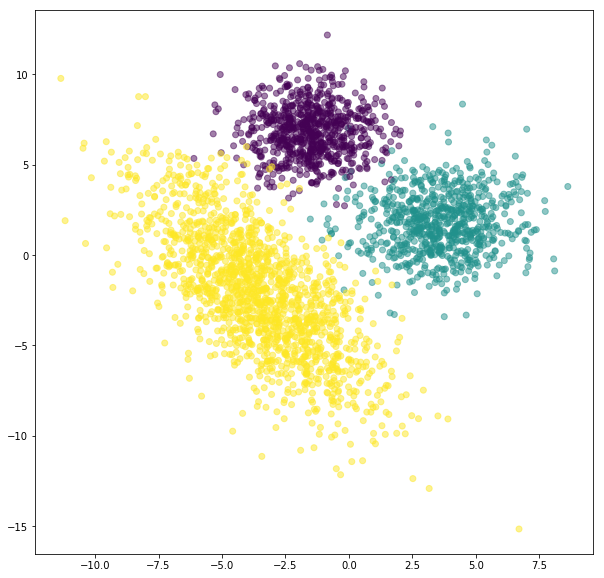

In [9]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [10]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
# pd.Series(counts,index=unique)

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [11]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

- n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
- init — способ начальной инициализации центроидов кластров;
- random_state — фиксирует генерацию случайного числа для инициализации центроидов.

Полный список параметров доступен в https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html - 

### Задание 7.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:
```python
k_means.fit(X)
```
Обучив, мы можем получить центроиды кластеров:
```python
k_means.cluster_centers_
```
И узнать, в какой кластер попал каждый из объектов:
```python
k_means.labels_
```
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.   

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

# Вывод
[0 1 2]
```
`astype(np.int)` конвертирует элементы массива в целые числа.

Подсказка: В ответ скопируйте и вставьте вывод кода. Пример ввода: [[X Y] [A B] [C D]]. Числа должны быть целые, без десятичных знаков и точек.

In [12]:
k_means = KMeans(n_clusters=3,random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


### Задание 7.5.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром `return_counts=True`:
```python
import numpyas np
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
# Вывод
3 2 1
```
Для визуализации получившегося датасета можно использовать следующий код:
```python
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()
```

In [14]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

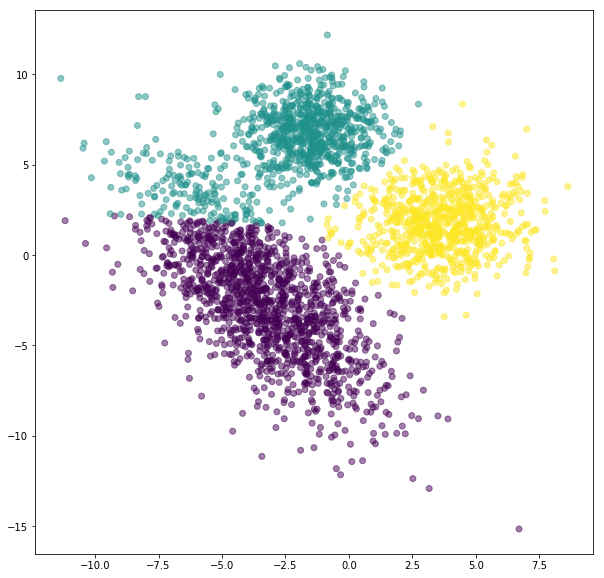

In [15]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

## ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

В датасете для учеников предоставлены следующие признаки:

- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv('./Unit_6_data/snsdata.csv')

X_sc = df.drop(columns=['gradyear','gender','age','friends'])

In [18]:
X_sc.head(10)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_sc)

In [20]:
k_means_sc = KMeans(n_clusters=9, random_state=123)

In [21]:
k_means_sc.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

### Задание 7.5.4
Укажите номер кластера, в который попало меньше всего учеников.

In [22]:
unique, counts = np.unique(k_means_sc.labels_,return_counts=True)

clasters_count = pd.Series(counts,index=unique)
clasters_count.idxmin()

5

In [23]:
clasters_count

0     5036
1     1337
2      752
3      697
4    20024
5        1
6      846
7      466
8      841
dtype: int64

В один из кластеров попали ученики с интересами ***music, god, dance, hair, shopping, cute, band, rock, football, church***. Сколько всего учеников попали в этот кластер?

In [24]:
features = df.drop(columns=['gradyear','gender','age','friends']).columns

In [25]:
x_feat = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']

In [26]:
x = [[int(f in x_feat) for f in features]]

In [27]:
x_claster = k_means_sc.predict(x)

In [28]:
clasters_count[x_claster]

0    5036
dtype: int64

## 7.6. EM-алгоритм. Практика

In [29]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

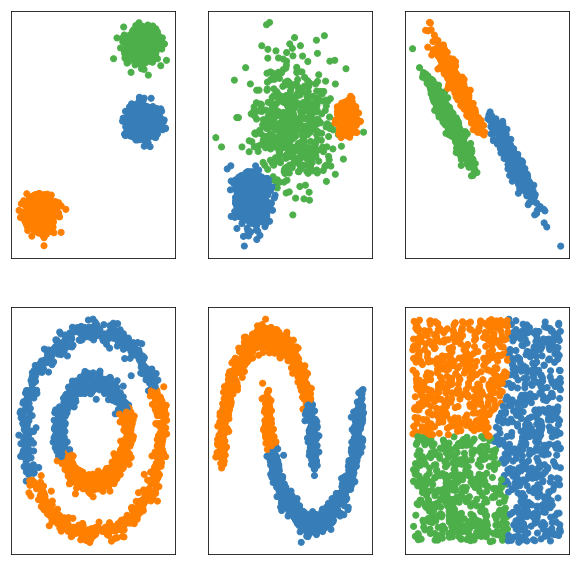

In [30]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:
```python
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()
```
В отличие от остальных рассматриваемых алгоритмов, ***EM-алгоритм*** лежит не в модуле `cluster`, а в модуле `mixture`. ***EM-алгоритм*** определяет смеси распределений в выборке, а не просто проводит кластеризацию.

Для обучения модели GaussianMixture необходимо вызвать метод ```fit```, передав входным параметром признаки объектов датасета:
```python
gm.fit(X)
```
Получить предсказания можно с помощью метода predict после метода `fit`:
```python
gm.fit(X)
y_pred = gm.predict(X)
```
Можно совместить эти два шага при помощи метода `fit_predict`:
```python
y_pred = gm.fit_predict(X)
```
Обучив, мы можем получить параметры распределений кластеров, например, средние:
```python
means = gm.means_
```

### Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

In [31]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

### Задание 7.6.2
Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

[0 1 2]
```  
`astype(np.int)` конвертирует элементы массива в целые числа.

В ответ скопируйте и вставьте вывод кода. 
Пример ввода: `[[X Y] [A B] [C D]]`

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [34]:
print(np.round(gm.means_).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


### Задание 7.6.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [35]:
_, counts = np.unique(gm.predict(X),return_counts=True)
for cnt in counts: print (cnt, end=' ')

744 763 1493 

### Задание 7.6.4
Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним ***EM-алгоритм*** , количество кластеров — `9`, `random_state = 123`. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [36]:
gm_sc = GaussianMixture(n_components=9, random_state=123)
gm_sc.fit(X_sc)

gm_sc.predict(X_sc[7:8])

array([3], dtype=int64)

Сколько итераций до схождения осуществил алгоритм? Вопрос относится к датасету об учениках старшей школы.

In [37]:
gm_sc.n_iter_

22

### 7.7. Агломеративная кластеризация. Практика
При инициализации можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

In [38]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 78 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 51 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


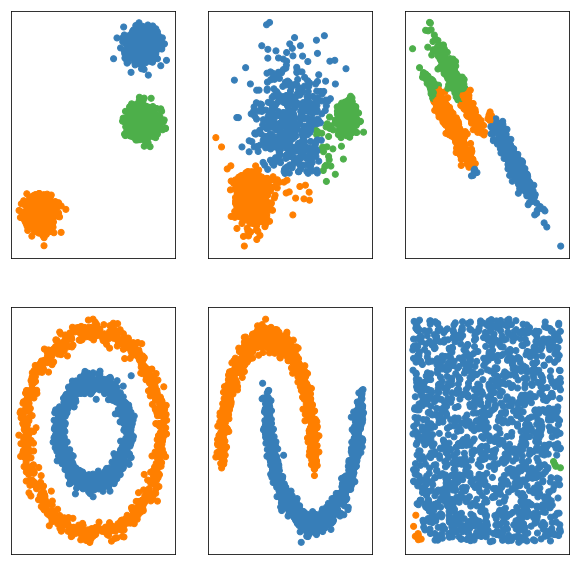

In [39]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Error",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

In [40]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Объект, который выполняет агломеративную кластеризацию датасета, инициализируется следующим образом:

```python
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering()
```
В отличие от `k-means`, `AgglomerativeClustering` не имеет параметра `random_state`.

Обучение модели `AgglomerativeClustering` проходит аналогично обучению модели `k-means`:
```python
ac.fit(X)
```
Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
```python
ac.labels_
```

### Задание 7.7.1
Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [41]:
ac_sc = AgglomerativeClustering(n_clusters=3)

ac_sc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x00000000051ED950>)

In [42]:
ac_sc.n_leaves_

3000

### Задание 7.7.2
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

In [43]:
np.unique(ac_sc.labels_,return_counts=True)

(array([0, 1, 2], dtype=int64), array([1112, 1142,  746], dtype=int64))

### Задание 7.7.3
При создании модели `AgglomerativeClustering` можно указать матрицу смежности, передав её в параметр `connectivity`. Построить матрицу смежности можно с помощью следующего кода:
```python
fromsklearn.neighborsimport kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
```
В переменной `connectivity` будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` и составленной матрицей смежности на признаках исходного датасета.

Посчитайте матрицу смежности, используя приведённый код. Подставьте получившееся значение в параметр `connectivity` при создании объекта `AgglomerativeClustering`. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

In [44]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [45]:
ac_sc_conmatr = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [46]:
ac_sc_conmatr.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
            linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x00000000051ED950>)

In [47]:
np.unique(ac_sc_conmatr.labels_,return_counts=True)

(array([0, 1, 2], dtype=int64), array([1486,  746,  768], dtype=int64))

### Задание 7.7.4
Постройте дендрограмму с помощью пакета scipy:

```python
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)
```
На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

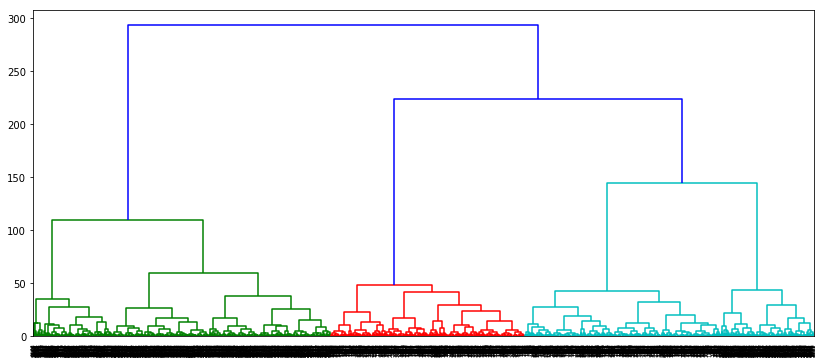

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
plt.figure(figsize=(14,6))
dendrogram(Z, leaf_rotation=90.);

In [8]:
ac_sc_thres = AgglomerativeClustering(n_clusters=None, compute_full_tree=True,distance_threshold=150)
ac_sc_thres.fit(X)

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
ac_sc_thres.n_clusters_

### Рассмотрим данные, содержащие информацию о составе различных продуктов.

In [ ]:
df = pd.read_csv('./Unit_6_data/food.csv',sep=' ')

In [ ]:
X = food.drop(columns='Name')

Попробуем построить на них иерархическую кластеризацию:

In [ ]:
plt.figure(figsize=(14,6))

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [ ]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

### Задание 7.7.6
Сколько всего кластеров получилось для продуктов?

In [ ]:
len(np.unique (labels))

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [ ]:
calcium_inds = X[X.Calcium.between(150,160)].index

In [ ]:
labels[calcium_inds]

Введите номер кластера, в который попал продукт с максимальной жирностью.

In [ ]:
labels[X.Calcium.idxmax()]

### 7.8. DBSCAN. Практика

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

In [ ]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

plt.figure(figsize=(12,8))

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:
```python
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
```
В отличие от `k-means` и `AgglomerativeClustering`, класс `DBSCAN` не имеет параметра `n_clusters`, поскольку `DBSCAN` автоматически определяет число кластеров в выборке.

Полный список параметров доступен в документации (англ.).

Обучение модели `DBSCAN` проходит аналогично обучению модели k-means:
```python
dbscan.fit(X)
```
Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
```python
dbscan.labels_
```

### Задание 7.8.2
Обучите модель DBSCAN с параметрами `eps=0.9` и `min_samples=35` на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что `DBSCAN` определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35)

In [ ]:
dbscan.fit(X)

In [ ]:
np.unique(dbscan.labels_)

### Задание 7.8.3
Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [ ]:
np.unique(dbscan.labels_,return_counts=True)

### Задание 7.8.4
Проверьте, как настройка параметров влияет на результат работы `DBSCAN`. Обучите модель `DBSCAN` с параметрами `eps=0.8` и `min_samples=35` на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [ ]:
dbscan_2 = DBSCAN(eps=0.8, min_samples=35)

dbscan_2.fit(X)

np.unique(dbscan_2.labels_,return_counts=True)

## ФУНКЦИОНАЛЫ КАЧЕСТВА
Существует очень много различных функционалов качества для кластеризации, но не существует наилучшего или оптимального. Каждый метод кластеризации можно рассматривать как алгоритм поиска оптимального значения некоторого функционала.

#### Среднее внутрикластерное расстояние:

$F_0=\frac{\sum [y_i=y_j]\rho (x_i,x_j)}{\sum [y_i=y_j]}$ — значение данного функционала должно быть как можно меньше, чтобы объекты располагались как можно ближе друг к другу внутри кластера.

#### Среднее межкластерное расстояние:

$F_1=\frac{\sum [y_i\neq y_j]\rho (x_i,x_j)}{\sum [y_i\neq y_j]}$ — значение этого функционала должно быть как можно больше, чтобы объекты из разных кластеров находились друг от друга как можно дальше.

#### Отношение этих двух расстояний:

$\frac{F_0}{F_1}\rightarrow min$  —  мы можем учитывать оба функционала, рассмотренные ранее( расстояние внутри кластера и между кластерами), и оптимизировать его. Естественно, нам нужно, чтобы оно было минимально (это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально).

#### Среднее расстояние до центра:

$\phi_0=\sum_{y\in Y}\frac{1}{|K_y|}\sum_{i:y_i=y}\rho^{2}(x_i,\mu_y)$ — должно быть как можно меньше, чтобы объекты располагались максимально близко к центру кластера.

#### Сумма межкластерных расстояний:

$\phi_1=\sum_{y_i=y}\rho^{2}(\mu_i,\mu)$ — должно быть максимальным, так как кластеры должны находиться друг от друга на как можно большем расстоянии.

#### Отношение этих двух расстояний:

$\frac{\phi_0}{\phi_1}\rightarrow min$

## КОЭФФИЦИЕНТ СИЛУЭТА
Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.

$a$ — среднее расстояние от данного объекта до объектов из того же кластера.  
$b$ — среднее расстояние от данного объекта до объектов из ближайшего кластера.  

$S=\frac{b-a}{max(a,b)}$ — значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами. Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной. Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много, слишком мало или просто данные плохо поддаются разделению на кластеры.

### Проверка наличия кластерной структуры

Генерируем $p$ случайных точек из равномерного распределения.  
Генерируем $p$ случайных точек из обучающей выборки.  
Вычисляем величину:
$\begin{equation}H_{i n d}=\frac{\sum_{n} w_{i}}{\sum_{n} q_{i}+\sum_{n} w_{i}}\end{equation}$

Эта статистика является одним из индикаторов тенденции к группированию. Для её расчета создается $B$ псевдо-наборов данных, сгенерированных случайным образом на основе распределения с тем же стандартным отклонением, что и оригинальный набор данных. Для каждого наблюдения $i$ из $n$ рассчитывается среднее расстояние до $k$ ближайших соседей: $w$ между реальными объектами и $q$ между искусственными объектами и их ближайшими реальными соседями. Если статистика превышает значение 0.5, то мы оставляем нулевую гипотезу, которая заключается в том, что $q$ и $w$ подобны и группируемые объекты распределены однородно и случайно

В случае, если статистика меньше чем 0.25, можно с 90% уверенностью отвергнуть нулевую гипотезу в пользу альтеративной, которая говорит о наличии тенденции к группировке данных.

## ВНЕШНИЕ МЕТРИКИ
Если исходные данные размечены, то мы можем использовать метки объектов для измерения качества кластеризации.

**Однородность** — кластер состоит только из объектов одного класса:

$h=1-\frac{H(C|K)}{H(C)}$  

В данной формуле $H(C|K)$ — энтропия класса при условии кластера, а $H(C)$ — энтропия класса

То есть, максимальное значение однородность достигает в том случае, если в кластере объекты одного класса.

**Полнота** — достигает максимальное значение в том случае, когда все объекты из класса принадлежат одному кластеру:

$c=1-\frac{H(K|C)}{H(K)}$  

В данной формуле $H(K|C)$ — энтропия кластера при условии класса, а $H(K)$  — энтропия кластера

**V-мера** — среднее гармоническое однородности и полноты, то есть метрика,  объединяющая эти два показателя:

$u=2\frac{hc}{h+c}$

#code

## 7.11. Коэффициент силуэта. Практика
В задачах используется датасет из прошлого модуля:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

**Коэффициент силуэта** можно посчитать при помощи реализации из библиотеки `sklearn`:

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131209788437305

В качестве параметров в функции `silhouette_score` используются:

- ***X*** — массив признаков объектов выборки или массив попарных расстояний между объектами;  
- ***Y*** — массив предсказанных кластеров для объектов выборки;  
- ***metric*** — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние), полный список названий метрик можно увидеть [здесь](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html).

При решении заданий модуля стандартизация должна быть выключена.

### Задание 7.11.1
Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [16]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=3, random_state=42)

In [19]:
em_gm.fit(X)

In [24]:
em_gm_pred = em_gm.predict(X)

In [27]:
silhouette_score(X=X, labels=em_gm_pred)

0.49893287606943293

In [ ]:
em_gm.fit

### Задание 7.11.2
Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

- K-means — `n_clusters=3, random_state=42`
- EM-алгоритм (GaussianMixture) — `n_components=3, random_state=42`
- Агломеративная кластеризация – `n_clusters=3`
- DBSCAN – `eps=0.9, min_samples=35`

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.